# importing libraries

In [40]:
import numpy as np #For numerical analysis
import pandas as pd #For reading data stored in various file formats
import seaborn as sns #For Special Visualizations and insights.
import matplotlib.pyplot as plt  #For visualizations
from pandas import set_option

In [41]:
!pip3 install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


# reading dataset

In [42]:
train = pd.read_csv('/home/adminspin/Music/used_car/train-data.csv')
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [43]:
test = pd.read_csv('/home/adminspin/Music/used_car/test-data.csv')
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


# checking for null values

In [44]:
train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [45]:
test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

# data cleaning

In [46]:
# Dropping New_Price column from training data and test data
train.drop(labels=['New_Price'], axis=1, inplace=True)
test.drop(labels=['New_Price'], axis=1, inplace=True)

In [47]:
# Drop the NA Values from Training Data
train.dropna(inplace=True)
train.reset_index(inplace=True)

In [48]:
# Drop the NA Values from Test Data
test.dropna(inplace=True)
test.reset_index(inplace=True)

In [49]:
train.head()

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [50]:
test.head()

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


# statistics

In [51]:
#The values in output of describe are rounded to 2 decimal places
set_option('precision',2) 

In [52]:
#Check statistics for train data
train.describe(include = 'all')

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5975.00,5975.00,5975,5975,5975.00,5.98e+03,5975,5975,5975,5975,5975,5975,5975.00,5975.00
unique,NaN,NaN,1855,11,NaN,NaN,4,2,4,442,145,371,NaN,NaN
top,NaN,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,NaN
freq,NaN,NaN,49,784,NaN,NaN,3195,4266,4903,172,606,235,NaN,NaN
mean,3008.81,3008.81,NaN,NaN,2013.39,5.87e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.28,9.50
std,1739.30,1739.30,NaN,NaN,3.25,9.16e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.81,11.21
min,0.00,0.00,NaN,NaN,1998.00,1.71e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.44
25%,1502.50,1502.50,NaN,NaN,2012.00,3.39e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50
50%,3010.00,3010.00,NaN,NaN,2014.00,5.30e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.65
75%,4514.50,4514.50,NaN,NaN,2016.00,7.30e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.00,9.95


In [53]:
#Check statistics for test data
test.describe(include = 'all')

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
count,1223.00,1223.00,1223,1223,1223.00,1223.00,1223,1223,1223,1223,1223,1223,1223.00
unique,NaN,NaN,759,11,NaN,NaN,4,2,4,301,104,249,NaN
top,NaN,NaN,Maruti Alto LXi,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN
freq,NaN,NaN,9,159,NaN,NaN,643,897,1018,35,126,45,NaN
mean,616.37,616.37,NaN,NaN,2013.41,58423.96,NaN,NaN,NaN,NaN,NaN,NaN,5.28
std,357.27,357.27,NaN,NaN,3.18,35565.44,NaN,NaN,NaN,NaN,NaN,NaN,0.83
min,0.00,0.00,NaN,NaN,1996.00,1000.00,NaN,NaN,NaN,NaN,NaN,NaN,2.00
25%,306.50,306.50,NaN,NaN,2011.00,34000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00
50%,615.00,615.00,NaN,NaN,2014.00,54407.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00
75%,926.50,926.50,NaN,NaN,2016.00,75000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00


# data pre-processing

# looking at name column

In [54]:
train['Name'][:10]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
5        Hyundai EON LPG Era Plus Option
6                 Nissan Micra Diesel XV
7      Toyota Innova Crysta 2.8 GX AT 8S
8    Volkswagen Vento Diesel Comfortline
9         Tata Indica Vista Quadrajet LS
Name: Name, dtype: object

In [55]:
test['Name'][:10]

0                      Maruti Alto K10 LXI CNG
1                Maruti Alto 800 2016-2019 LXI
2    Toyota Innova Crysta Touring Sport 2.4 MT
3                         Toyota Etios Liva GD
4                            Hyundai i20 Magna
5                       Mahindra XUV500 W8 2WD
6          Toyota Fortuner 4x2 AT TRD Sportivo
7                         Hyundai EON Era Plus
8                          Honda City 1.5 S MT
9                       Mahindra XUV500 W6 2WD
Name: Name, dtype: object

In [56]:
# Lets clean the data so that we can store company name and Model name of car in a seperate column
train['Brand'] = train['Name'].apply(lambda x: x.split(" ")[0])
train['Model_Name'] = train['Name'].apply(lambda x: " ".join(x.split(" ")[1:]))

test['Brand'] = test['Name'].apply(lambda x: x.split(" ")[0])
test['Model_Name'] = test['Name'].apply(lambda x: " ".join(x.split(" ")[1:]))

# Drop the Name column after adding the columns
train.drop(labels=['Name'], axis=1, inplace=True)

test.drop(labels=['Name'], axis=1, inplace=True)

In [57]:
train.columns

Index(['index', 'Unnamed: 0', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Brand', 'Model_Name'],
      dtype='object')

In [58]:
test.columns

Index(['index', 'Unnamed: 0', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Brand', 'Model_Name'],
      dtype='object')

In [59]:
train = train[['Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
         'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [60]:
test = test[['Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
         'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

# cleaning mileage,engine and power columns

In [61]:
# Extract the numerical from the object data using split commands in both training data
train['Mileage'] = train['Mileage'].apply(lambda x: str(x.split(" ")[0]))
train['Engine'] = train['Engine'].apply(lambda x: str(x.split(" ")[0]))
train['Power'] = train['Power'].apply(lambda x: str(x.split(" ")[0]))

In [62]:
# Extract the numerical from the object data using split commands in both training data
test['Mileage'] = test['Mileage'].apply(lambda x: str(x.split(" ")[0]))
test['Engine'] = test['Engine'].apply(lambda x: str(x.split(" ")[0]))
test['Power'] = test['Power'].apply(lambda x: str(x.split(" ")[0]))

In [63]:
train.head()

,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [64]:
test.head()

,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota,Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


# removing rows with null value in power

In [65]:
train.shape , test.shape

((5975, 13), (1223, 12))

In [66]:
train = train[train['Power'] != 'null']
test = test[test['Power'] != 'null']

In [67]:
train.shape , test.shape

((5872, 13), (1201, 12))

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5872 non-null   object 
 1   Model_Name         5872 non-null   object 
 2   Location           5872 non-null   object 
 3   Year               5872 non-null   int64  
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   object 
 9   Engine             5872 non-null   object 
 10  Power              5872 non-null   object 
 11  Seats              5872 non-null   float64
 12  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 642.2+ KB


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1222
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1201 non-null   object 
 1   Model_Name         1201 non-null   object 
 2   Location           1201 non-null   object 
 3   Year               1201 non-null   int64  
 4   Kilometers_Driven  1201 non-null   int64  
 5   Fuel_Type          1201 non-null   object 
 6   Transmission       1201 non-null   object 
 7   Owner_Type         1201 non-null   object 
 8   Mileage            1201 non-null   object 
 9   Engine             1201 non-null   object 
 10  Power              1201 non-null   object 
 11  Seats              1201 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 122.0+ KB


# if we observe above information mileage,engine,power there are class object which actually can be int/float

In [70]:
# Extract the numerical from the object data using split commands in training data
train['Mileage'] = train['Mileage'].apply(lambda x: float(x))
train['Engine'] = train['Engine'].apply(lambda x: float(x))
train['Power'] = train['Power'].apply(lambda x: float(x))

In [71]:
# Extract the numerical from the object data using split commands in training data
test['Mileage'] = test['Mileage'].apply(lambda x: float(x))
test['Engine'] = test['Engine'].apply(lambda x: float(x))
test['Power'] = test['Power'].apply(lambda x: float(x))

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5872 non-null   object 
 1   Model_Name         5872 non-null   object 
 2   Location           5872 non-null   object 
 3   Year               5872 non-null   int64  
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   float64
 9   Engine             5872 non-null   float64
 10  Power              5872 non-null   float64
 11  Seats              5872 non-null   float64
 12  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 642.2+ KB


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1222
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1201 non-null   object 
 1   Model_Name         1201 non-null   object 
 2   Location           1201 non-null   object 
 3   Year               1201 non-null   int64  
 4   Kilometers_Driven  1201 non-null   int64  
 5   Fuel_Type          1201 non-null   object 
 6   Transmission       1201 non-null   object 
 7   Owner_Type         1201 non-null   object 
 8   Mileage            1201 non-null   float64
 9   Engine             1201 non-null   float64
 10  Power              1201 non-null   float64
 11  Seats              1201 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 122.0+ KB


# kilometers driven column

# for train

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kilometers_Driven'>

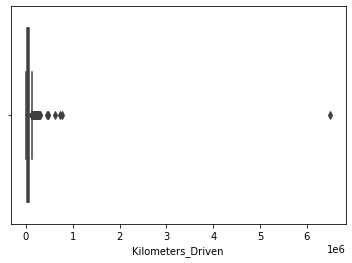

In [74]:
sns.boxplot(train['Kilometers_Driven'])

some outliers are present ...from above max data resides with in 3lakhs

In [75]:
# Clean the top outliers
for i in np.arange(50):
    index = train[train['Kilometers_Driven'] == train['Kilometers_Driven'].max()].index
    train.drop(index=index, inplace=True, axis=1)
train.reset_index(inplace=True)

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kilometers_Driven'>

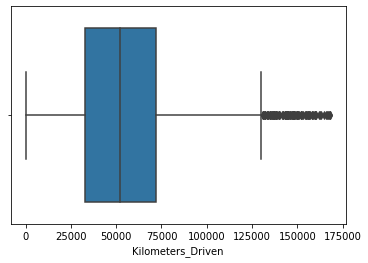

In [76]:
sns.boxplot(train['Kilometers_Driven'])

# for test

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kilometers_Driven'>

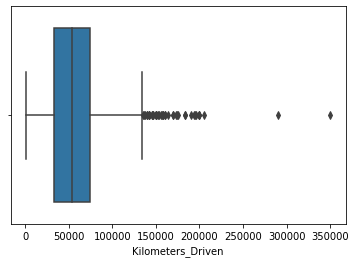

In [77]:
sns.boxplot(test['Kilometers_Driven'])

In [78]:
# Clean the top outliers
for i in np.arange(50):
    index = test[test['Kilometers_Driven'] == test['Kilometers_Driven'].max()].index
    test.drop(index=index, inplace=True, axis=1)
test.reset_index(inplace=True)

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kilometers_Driven'>

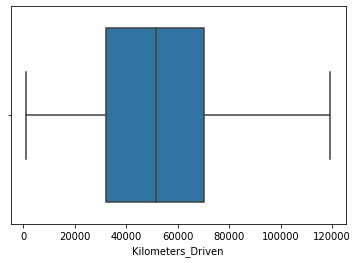

In [79]:
sns.boxplot(test['Kilometers_Driven'])

# engine column

# for train

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Engine'>

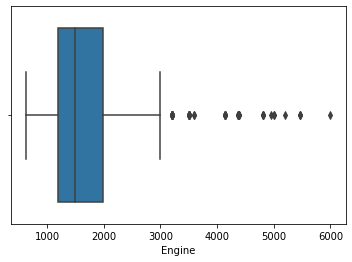

In [80]:
sns.boxplot(train['Engine'])

In [81]:
# Clean the top outliers
for i in np.arange(7):
    index = train[train['Engine'] == train['Engine'].max()].index
    train.drop(index=index, inplace=True, axis=1)
train.reset_index(inplace=True)

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Engine'>

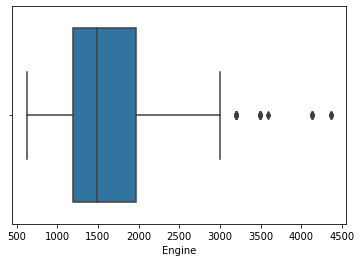

In [82]:
sns.boxplot(train['Engine'])

# for test

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Engine'>

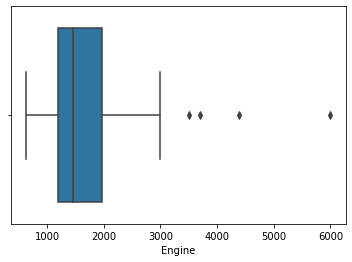

In [83]:
sns.boxplot(test['Engine'])

In [84]:
# Clean the top outliers
for i in np.arange(7):
    index = test[test['Engine'] == test['Engine'].max()].index
    test.drop(index=index, inplace=True, axis=1)
test.reset_index(inplace=True)

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Engine'>

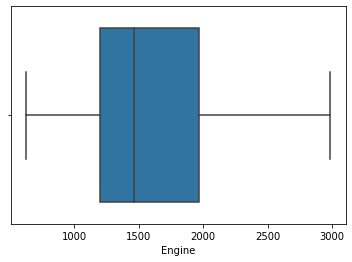

In [85]:
sns.boxplot(test['Engine'])

# power column

# for train

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Power'>

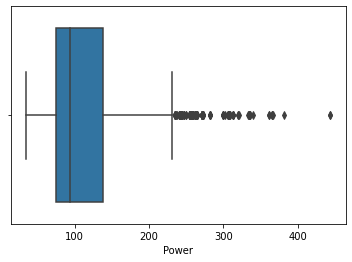

In [86]:
sns.boxplot(train['Power'])

In [87]:
# Clean the top outliers
for i in np.arange(25):
    index = train[train['Power'] == train['Power'].max()].index
    train.drop(index=index, inplace=True, axis=1)

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Power'>

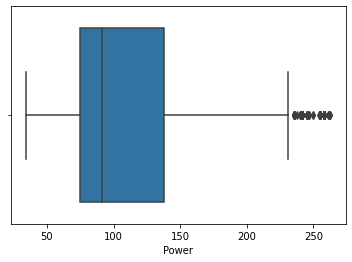

In [88]:
sns.boxplot(train['Power'])

# for test

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Power'>

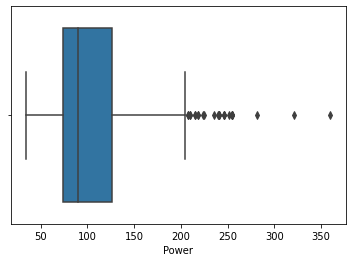

In [89]:
sns.boxplot(test['Power'])

In [90]:
# Clean the top outliers
for i in np.arange(25):
    index = test[test['Power'] == test['Power'].max()].index
    test.drop(index=index, inplace=True, axis=1)

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Power'>

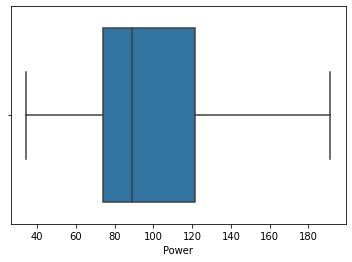

In [91]:
sns.boxplot(test['Power'])

# seat and engine column

In [92]:
#Covert Seats and Engine feature to int
train['Seats']=train['Seats'].astype(int)
train['Engine']=train['Engine'].astype(int)

test['Seats']=test['Seats'].astype(int)
test['Engine']=test['Engine'].astype(int)

# data visualization

In [93]:
train.head()

,level_0,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [94]:
test.head()

,level_0,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,0,Maruti,Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.20,4
1,1,1,Maruti,Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5
2,2,2,Toyota,Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7
3,3,4,Hyundai,i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5
4,4,5,Mahindra,XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179,140.00,7


In [95]:
train.shape , test.shape

((5713, 15), (1065, 14))

# top brands

<AxesSubplot:>

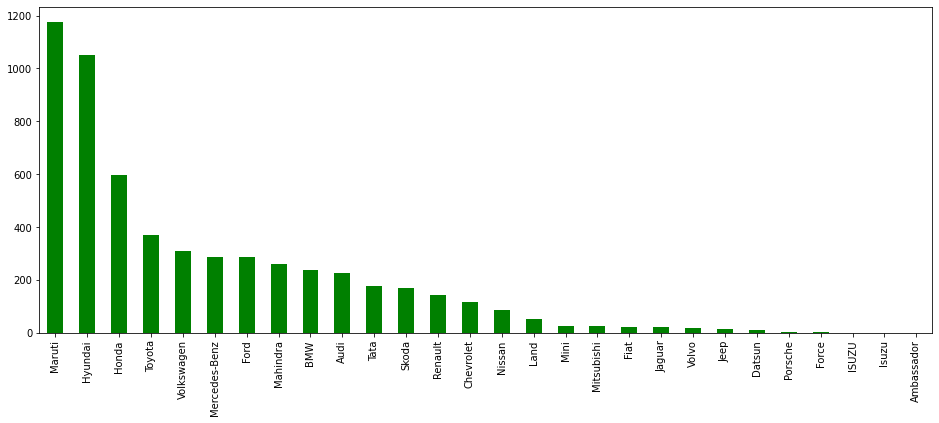

In [96]:
# Let us look at the top brands
plt.figure(figsize=(16,6))
pd.value_counts(train['Brand']).plot.bar(color='g')

most cars are from MARUTHI,HYUNDAI,HONDA

# location

<AxesSubplot:>

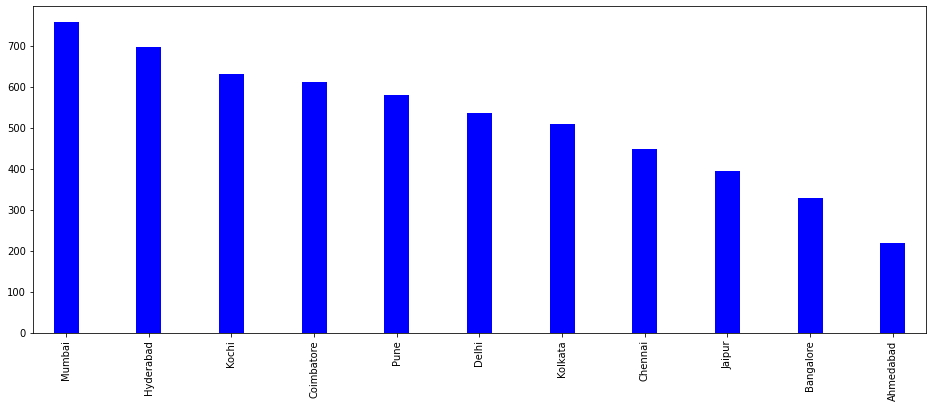

In [97]:
# Let us look at the location type
plt.figure(figsize=(16,6))
pd.value_counts(train['Location']).plot.bar(color='b', width=0.3)

most cars are from MUMBAI,HYDERABAD,KOCHI

# fuel 

<AxesSubplot:>

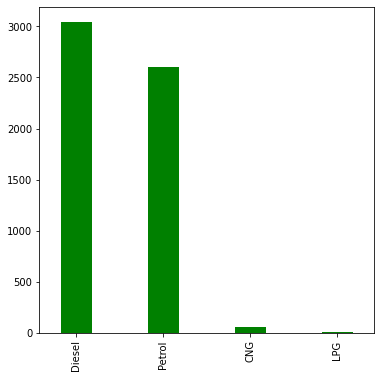

In [98]:
# Let us look at the fuel type
plt.figure(figsize=(6,6))
pd.value_counts(train['Fuel_Type']).plot.bar(color='g', width = 0.35)

most cars are of DIESEL,PETROL

# transmission type

<AxesSubplot:>

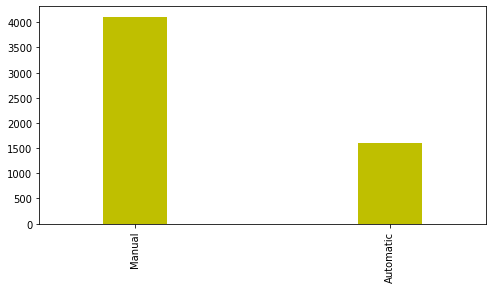

In [99]:
# Let us look at the transmission type
plt.figure(figsize=(8,4))
pd.value_counts(train['Transmission']).plot.bar(color='y', width = 0.25)

# owner type

<AxesSubplot:>

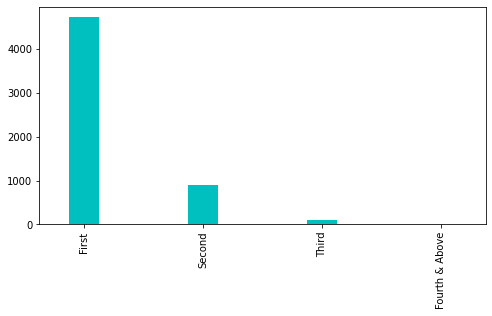

In [100]:
# Let us look at the owner type
plt.figure(figsize=(8,4))
pd.value_counts(train['Owner_Type']).plot.bar(color='c', width = 0.25)

most of the owners are of first type

# Brand V/s Price

In [101]:
sns.set(rc={'figure.figsize':(12.27,12.27)})

<AxesSubplot:xlabel='Price', ylabel='Brand'>

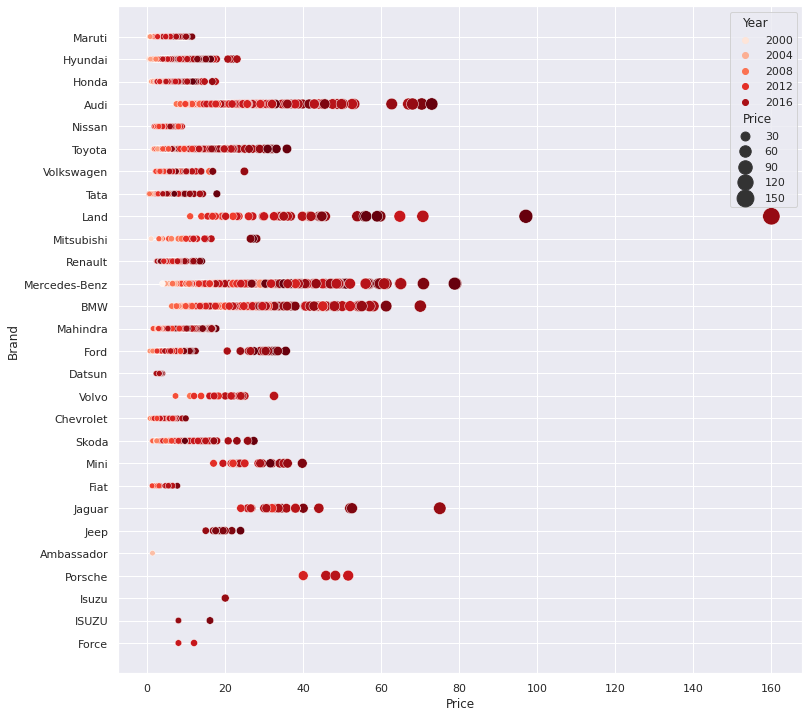

In [102]:
sns.scatterplot(x = 'Price', y = 'Brand', data = train, size = 'Price', hue = 'Year',
                sizes=(30, 300), palette="Reds")

Observation: 

Cars from Fiat, Datsun, Chevrolet, Honda, Isuzu, Mahindra, Maruti, Nissan, Tata, Smart, Renault, Jeep, VolksWagon sell for less than 20 Lakhs with a very few exceptions in case of Jeep.

Where as for the cars from Audi, BMW, Ford, Toyota, Jaguar, Land Rover the prices go upto 1 Crore !

Also cars that are older sell for lower price than the new ones. Although a few exception of this trend                        is observed for cars of premium brands like porsche, jaguar etc.



# Mileage V/s Price

In [103]:
cars_without_elec = train[train.Fuel_Type != 'Electric']

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

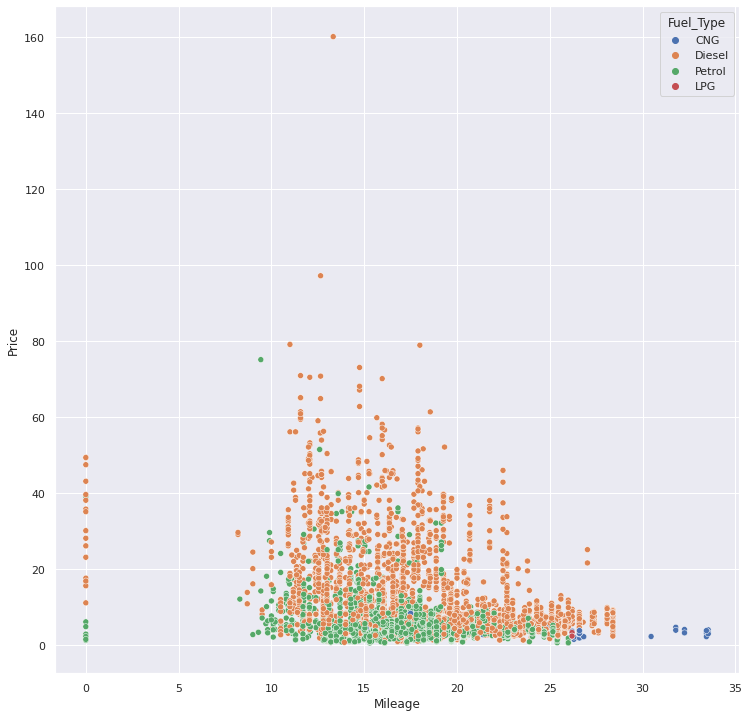

In [104]:
sns.scatterplot(x = 'Mileage', y = 'Price', data = cars_without_elec, hue = 'Fuel_Type')

 Mileage has no linear relation with Price.

# Year V/s Price

In [105]:
sns.set(rc={'figure.figsize':(10.27,10.27)})

<AxesSubplot:xlabel='Year', ylabel='Price'>

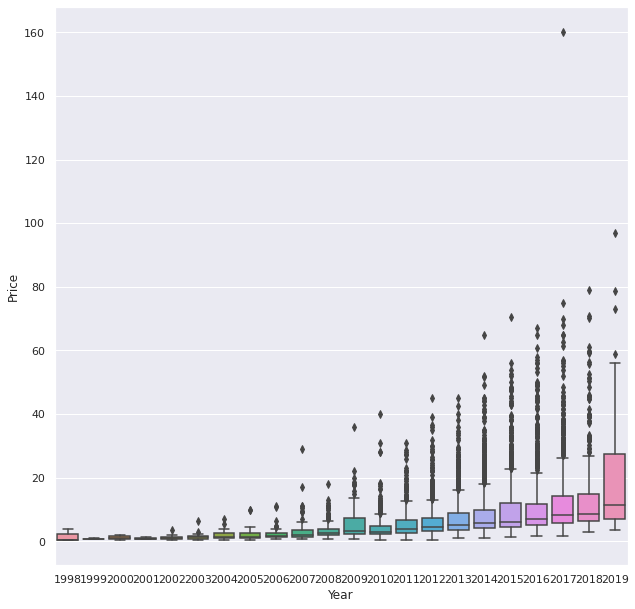

In [106]:
sns.boxplot(x = 'Year', y = 'Price', data = train)

Newer cars sell for higher prices.

# Km V/s Price

<AxesSubplot:xlabel='Price'>

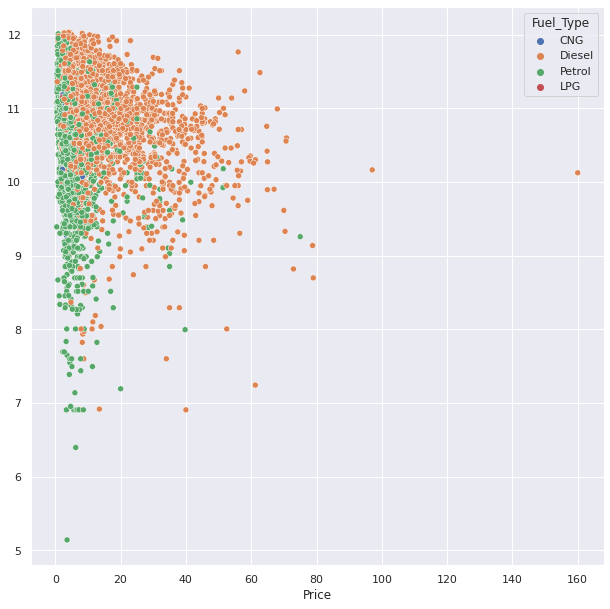

In [107]:
kms = [np.log(km) for km in train.Kilometers_Driven]
sns.scatterplot(x = 'Price', y = kms, data = train, hue = 'Fuel_Type')

For any range of km driven, Diesel cars sell for higher price than Petrol or an other fuel cars.

# Fuel V/s Price

In [108]:
sns.set(rc={'figure.figsize':(8.27,8.27)})

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

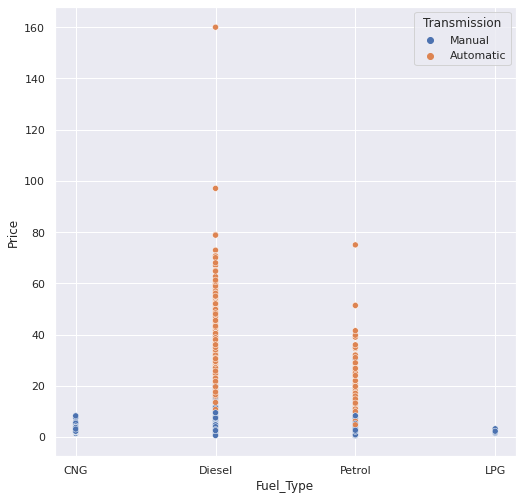

In [109]:
sns.scatterplot(x = 'Fuel_Type', y = 'Price', data = train, hue = 'Transmission')

Observation:

Diesel and Petrol cars having Automatic tranmission sell for higher price than cars with Manual transmission.

CNG & LPG cars sell for price lower than 15L.

# Engine Vs Price

<AxesSubplot:xlabel='Engine', ylabel='Price'>

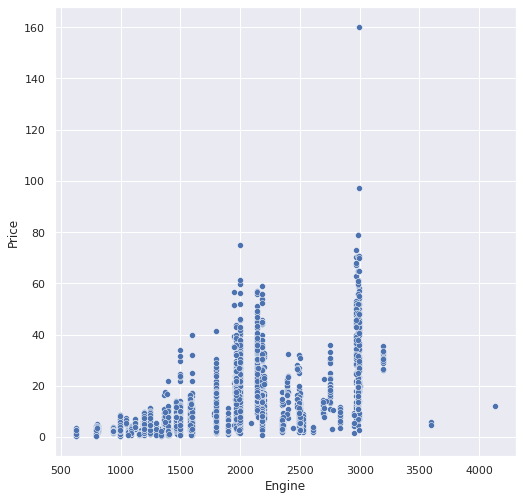

In [110]:
sns.scatterplot(y = 'Price', x = 'Engine', data = train)

# Power Vs Price

<AxesSubplot:xlabel='Power', ylabel='Price'>

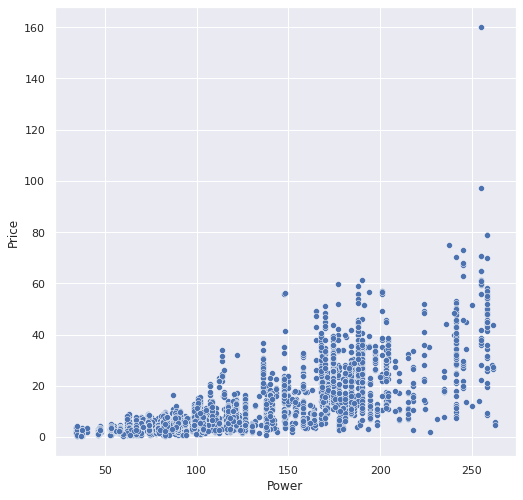

In [111]:
sns.scatterplot(y = 'Price', x = 'Power', data = train)

# Seats V/s Price

<AxesSubplot:xlabel='Seats', ylabel='Price'>

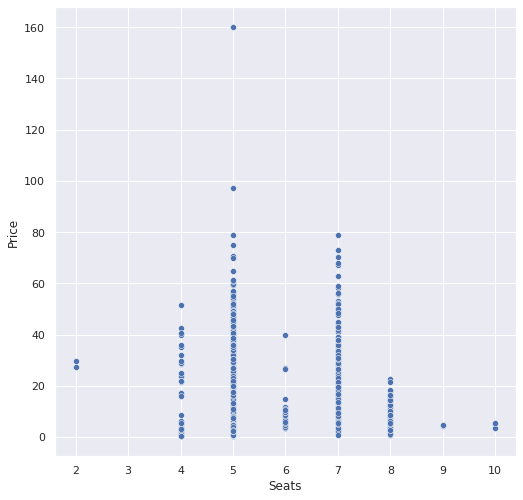

In [112]:
sns.scatterplot(x = 'Seats', y = 'Price', data = train)

Observation

Cars with two seats sell for higer prices.

Cars with 6, 8 or more than 8 seats sell for less price.

But for cars with 4, 5, 7 seats nothing about price can be said based on number of seats only.

# Transmission V/s price

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

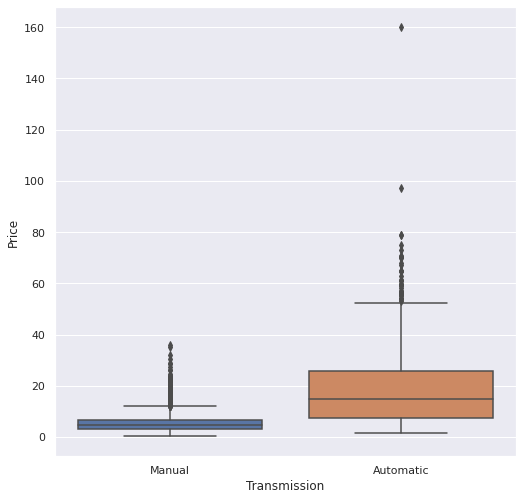

In [113]:
sns.boxplot('Transmission', 'Price', data = train)

Clearly Automatic cars have a higher selling price than Manual cars.

# Owner V/s Price

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

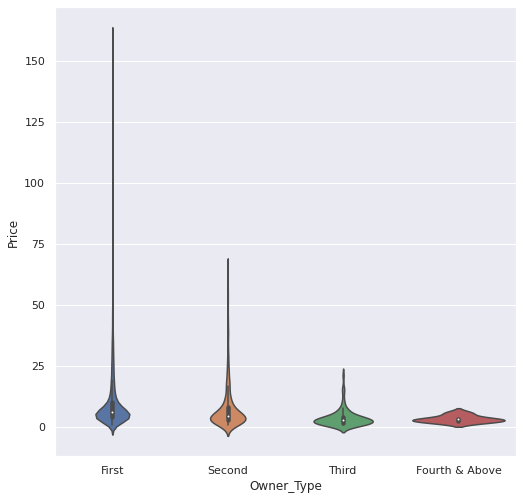

In [114]:
sns.violinplot('Owner_Type', 'Price', data = train)

# Location V/s Price

/home/adminspin/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price', ylabel='Location'>

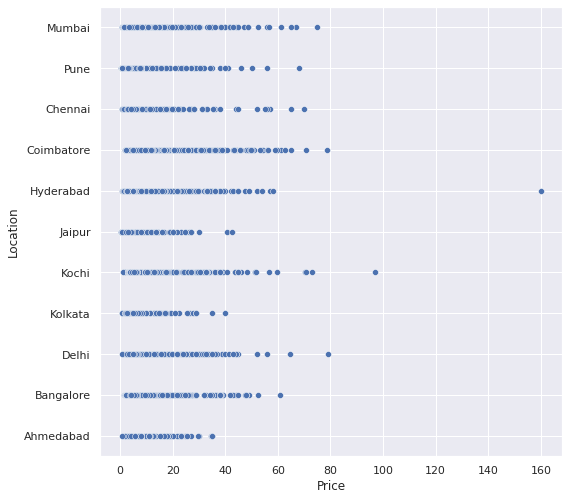

In [115]:
sns.scatterplot('Price','Location', data = train)

# correlation for cts variables

In [116]:
data_continous = train[['Kilometers_Driven','Mileage','Engine','Power']]

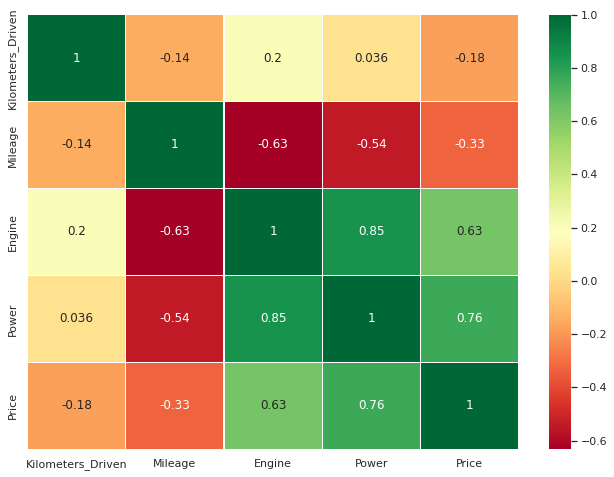

In [117]:
#Heat map of all continuous variables, ignored the categorical variables
data_continous_temp = data_continous.copy()
data_continous_temp['Price'] = train.Price
sns.heatmap(data_continous_temp.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

Engine - 0.58 and Power - 0.74 are highly co-related

# scatter plot for cts variables

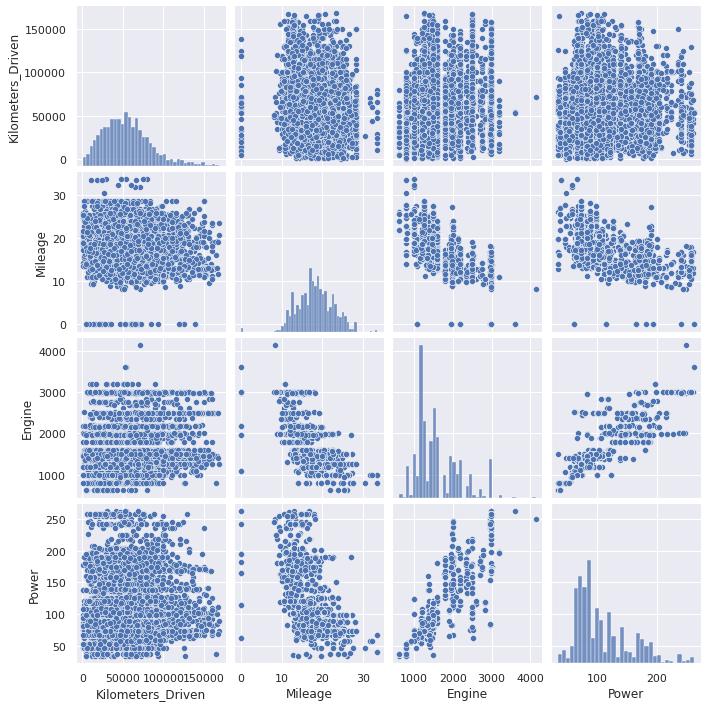

In [118]:
# Scatter plot matrix using seaborn library
sns.pairplot(data_continous)
plt.show()

In [119]:
train.drop(labels=['level_0'], axis=1, inplace=True)
train.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [120]:
train.isnull().sum().sum()

0

In [121]:
test.isnull().sum().sum()

0

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5713 entries, 0 to 5789
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5713 non-null   int64  
 1   Brand              5713 non-null   object 
 2   Model_Name         5713 non-null   object 
 3   Location           5713 non-null   object 
 4   Year               5713 non-null   int64  
 5   Kilometers_Driven  5713 non-null   int64  
 6   Fuel_Type          5713 non-null   object 
 7   Transmission       5713 non-null   object 
 8   Owner_Type         5713 non-null   object 
 9   Mileage            5713 non-null   float64
 10  Engine             5713 non-null   int64  
 11  Power              5713 non-null   float64
 12  Seats              5713 non-null   int64  
 13  Price              5713 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 829.5+ KB


In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 0 to 1113
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            1065 non-null   int64  
 1   index              1065 non-null   int64  
 2   Brand              1065 non-null   object 
 3   Model_Name         1065 non-null   object 
 4   Location           1065 non-null   object 
 5   Year               1065 non-null   int64  
 6   Kilometers_Driven  1065 non-null   int64  
 7   Fuel_Type          1065 non-null   object 
 8   Transmission       1065 non-null   object 
 9   Owner_Type         1065 non-null   object 
 10  Mileage            1065 non-null   float64
 11  Engine             1065 non-null   int64  
 12  Power              1065 non-null   float64
 13  Seats              1065 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 124.8+ KB


# converting categorical values to numerical

In [124]:
# Convert the categorical data info numerical categories for machine to understand using LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()

In [125]:
# Encode the categorical columns of training data
train['Brand_en'] = encoder.fit_transform(train['Brand'])
train['Model_Name_en'] = encoder.fit_transform(train['Model_Name'])
train['Location_en'] = encoder.fit_transform(train['Location'])
train['Owner_Type_en'] = encoder.fit_transform(train['Owner_Type'])
train['Fuel_Type_en'] = encoder.fit_transform(train['Fuel_Type'])
train['Transmission_en'] = encoder.fit_transform(train['Transmission'])

In [127]:
train.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_en,Model_Name_en,Location_en,Owner_Type_en,Fuel_Type_en,Transmission_en
0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,16,1525,9,0,0,1
1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,9,431,10,0,1,1
2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,8,856,2,0,3,1
3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,16,581,2,0,1,1
4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,1,83,3,2,1,0


In [158]:
train['Brand']+" "+train['Model_Name'].str.split(" ",expand=True)[0]

0         Maruti Wagon
1        Hyundai Creta
2           Honda Jazz
3        Maruti Ertiga
4              Audi A4
             ...      
5785      Maruti Swift
5786     Hyundai Xcent
5787     Mahindra Xylo
5788      Maruti Wagon
5789    Chevrolet Beat
Length: 5713, dtype: object

In [162]:
train

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_en,Model_Name_en,Location_en,Owner_Type_en,Fuel_Type_en,Transmission_en
0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,16,1525,9,0,0,1
1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,9,431,10,0,1,1
2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,8,856,2,0,3,1
3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,16,581,2,0,1,1
4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,1,83,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,5970,Maruti,Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,16,1364,4,0,1,1
5786,5971,Hyundai,Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,9,1598,6,0,1,1
5787,5972,Mahindra,Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,15,1623,6,2,1,1
5788,5973,Maruti,Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,16,1532,8,0,3,1


In [168]:
sar = {}
for i in sorted(train['Brand_en'].unique()):
    print('<option value="'+str(i)+'">'+train[train['Brand_en'] == i]['Brand'].unique()[0]+'</option>')
    sar[i] = train[train['Brand_en'] == i]['Brand'].unique()
    #<option value="0">Audi</option>

<option value="0">Ambassador</option>
<option value="1">Audi</option>
<option value="2">BMW</option>
<option value="3">Chevrolet</option>
<option value="4">Datsun</option>
<option value="5">Fiat</option>
<option value="6">Force</option>
<option value="7">Ford</option>
<option value="8">Honda</option>
<option value="9">Hyundai</option>
<option value="10">ISUZU</option>
<option value="11">Isuzu</option>
<option value="12">Jaguar</option>
<option value="13">Jeep</option>
<option value="14">Land</option>
<option value="15">Mahindra</option>
<option value="16">Maruti</option>
<option value="17">Mercedes-Benz</option>
<option value="18">Mini</option>
<option value="19">Mitsubishi</option>
<option value="20">Nissan</option>
<option value="21">Porsche</option>
<option value="22">Renault</option>
<option value="23">Skoda</option>
<option value="24">Tata</option>
<option value="25">Toyota</option>
<option value="26">Volkswagen</option>
<option value="27">Volvo</option>


In [166]:
sar = {}
for i in sorted(train['Model_Name_en'].unique()):
    print('<option value="'+str(i)+'">'+train[train['Model_Name_en'] == i]['Model_Name'].unique()[0]+'</option>')
    # sar[i] = train[train['Brand'] == i]['Brand_en'].unique()[0]
    #<option value="0">Audi</option>

<option value="0">1 Series 118d Base</option>
<option value="1">1 Series 118d Sport Line</option>
<option value="2">3 Series 2005-2011 325i Sedan</option>
<option value="3">3 Series 318i Sedan</option>
<option value="4">3 Series 320d</option>
<option value="5">3 Series 320d Corporate Edition</option>
<option value="6">3 Series 320d Dynamic</option>
<option value="7">3 Series 320d GT Luxury Line</option>
<option value="8">3 Series 320d Highline</option>
<option value="9">3 Series 320d Luxury Line</option>
<option value="10">3 Series 320d Luxury Plus</option>
<option value="11">3 Series 320d M Sport</option>
<option value="12">3 Series 320d Prestige</option>
<option value="13">3 Series 320d Sedan</option>
<option value="14">3 Series 320d Sport</option>
<option value="15">3 Series 320d Sport Line</option>
<option value="16">3 Series 320i</option>
<option value="17">3 Series 320i Sedan</option>
<option value="18">3 Series 328i Sport Line</option>
<option value="19">3 Series 330 Ci Converti

In [167]:
sar

{}

In [161]:
sar

{}

In [129]:
train['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Datsun', 'Volvo',
       'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jaguar', 'Jeep',
       'Ambassador', 'Porsche', 'Isuzu', 'ISUZU', 'Force'], dtype=object)

In [131]:
train.groupby('Brand').agg({'Brand_en':['mean','median']})

Brand_en       
                  mean median
Brand                        
Ambassador           0      0
Audi                 1      1
BMW                  2      2
Chevrolet            3      3
Datsun               4      4
Fiat                 5      5
Force                6      6
Ford                 7      7
Honda                8      8
Hyundai              9      9
ISUZU               10     10
Isuzu               11     11
Jaguar              12     12
Jeep                13     13
Land                14     14
Mahindra            15     15
Maruti              16     16
Mercedes-Benz       17     17
Mini                18     18
Mitsubishi          19     19
Nissan              20     20
Porsche             21     21
Renault             22     22
Skoda               23     23
Tata                24     24
Toyota              25     25
Volkswagen          26     26
Volvo               27     27

# Scaling/Normalization of Features

In [356]:
train.describe()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00,5713.00
mean,2992.34,13.71,874.64,5.63,2013.52,55331.63,1.90,0.72,0.36,18.40,1589.63,109.76,5.28,9.07
std,1719.86,7.22,527.73,2.95,3.14,30020.56,1.01,0.45,0.80,4.32,543.58,46.05,0.78,9.97
min,0.00,0.00,0.00,0.00,1998.00,171.00,0.00,0.00,0.00,0.00,624.00,34.20,2.00,0.44
25%,1506.00,8.00,405.00,3.00,2012.00,33284.00,1.00,0.00,0.00,15.50,1197.00,75.00,5.00,3.50
50%,2994.00,15.00,839.00,6.00,2014.00,52207.00,1.00,1.00,0.00,18.50,1462.00,91.20,5.00,5.65
75%,4478.00,17.00,1364.00,8.00,2016.00,72000.00,3.00,1.00,0.00,21.12,1968.00,138.00,5.00,9.73
max,5974.00,27.00,1745.00,10.00,2019.00,168205.00,3.00,1.00,3.00,33.54,4134.00,262.60,10.00,160.00


In [357]:
train_x = train.drop(['Price'], axis = 1)
train_y = train[['Price']]

In [358]:
train_x.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,16,1525,9,2010,72000,0,1,0,26.60,998,58.16,5
1,1,9,431,10,2015,41000,1,1,0,19.67,1582,126.20,5
2,2,8,856,2,2011,46000,3,1,0,18.20,1199,88.70,5
3,3,16,581,2,2012,87000,1,1,0,20.77,1248,88.76,7
4,4,1,83,3,2013,40670,1,0,2,15.20,1968,140.80,5


In [359]:
train_y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


In [360]:
sc = StandardScaler()
train_arr_scld = sc.fit_transform(train_x)
train_x=pd.DataFrame(train_arr_scld, columns=train_x.columns)

C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [361]:
train_x.describe()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
count,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03,5.71e+03
mean,7.30e-16,3.86e-16,6.56e-17,-5.95e-18,2.83e-14,-2.99e-17,1.19e-15,6.45e-16,1.70e-16,-1.02e-15,-2.77e-17,1.75e-16,-9.92e-16
std,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
min,-1.74e+00,-1.90e+00,-1.66e+00,-1.91e+00,-4.94e+00,-1.84e+00,-1.89e+00,-1.60e+00,-4.52e-01,-4.26e+00,-1.78e+00,-1.64e+00,-4.22e+00
25%,-8.64e-01,-7.92e-01,-8.90e-01,-8.93e-01,-4.84e-01,-7.34e-01,-8.97e-01,-1.60e+00,-4.52e-01,-6.72e-01,-7.22e-01,-7.55e-01,-3.65e-01
50%,9.64e-04,1.78e-01,-6.75e-02,1.25e-01,1.52e-01,-1.04e-01,-8.97e-01,6.24e-01,-4.52e-01,2.31e-02,-2.35e-01,-4.03e-01,-3.65e-01
75%,8.64e-01,4.55e-01,9.27e-01,8.04e-01,7.88e-01,5.55e-01,1.09e+00,6.24e-01,-4.52e-01,6.30e-01,6.96e-01,6.13e-01,-3.65e-01
max,1.73e+00,1.84e+00,1.65e+00,1.48e+00,1.74e+00,3.76e+00,1.09e+00,6.24e-01,3.30e+00,3.51e+00,4.68e+00,3.32e+00,6.07e+00


# model

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [363]:
train_X = train_x
train_Y = train_y

In [364]:
train_X.columns

Index(['index', 'Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats'],
      dtype='object')

In [365]:
train_Y.columns

Index(['Price'], dtype='object')

# RandomForestRegressor

In [366]:
#Train Test Split on the Train dataset
seed = 15
test_size = 0.3
X_train, X_val, Y_train, Y_val = train_test_split(train_X, train_Y, test_size = test_size, random_state = seed)

In [367]:
reg = RandomForestRegressor()
reg.fit(X_train,  Y_train)

C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sarve\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [368]:
Y_train_pred = reg.predict(X_train)
Y_val_pred = reg.predict(X_val)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_val,Y_val_pred))
print('RandomForestRegressor Train RMSE: ', train_RMSE)
print('RandomForestRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', reg.score(X_train,Y_train))
print('Score for Validation Data: ', reg.score(X_val,Y_val))

RandomForestRegressor Train RMSE:  1.2554185037886425
RandomForestRegressor Validation RMSE:  3.691925407047367
Score for Train Data:  0.983581194535734
Score for Validation Data:  0.8733064501487009


In [369]:
#Using Cross Validation
scores = cross_val_score(reg, train_X, train_Y, cv=10)
scores

C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sarve\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

array([0.91826931, 0.92077345, 0.89717512, 0.89803981, 0.94498157,
       0.92257389, 0.77753435, 0.92868157, 0.92178082, 0.90535649])

In [370]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.09)


# KNeighborsRegressor

In [371]:
reg = KNeighborsRegressor()
reg.fit(X_train,  Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [372]:
Y_train_pred = reg.predict(X_train)
Y_val_pred = reg.predict(X_val)

train_RMSE=np.sqrt(mean_squared_error(Y_train,Y_train_pred))
val_RMSE=np.sqrt(mean_squared_error(Y_val,Y_val_pred))
print('KNeighborsRegressor Train RMSE: ', train_RMSE)
print('KNeighborsRegressor Validation RMSE: ', val_RMSE)
print('Score for Train Data: ', reg.score(X_train,Y_train))
print('Score for Validation Data: ', reg.score(X_val,Y_val))

KNeighborsRegressor Train RMSE:  3.0482778569994844
KNeighborsRegressor Validation RMSE:  4.373852052363301
Score for Train Data:  0.903200389699123
Score for Validation Data:  0.8221815391648241


In [373]:
scores = cross_val_score(reg, train_x, train_y, cv=10)
scores

array([0.85041004, 0.82829765, 0.86551946, 0.84496971, 0.91698904,
       0.84801111, 0.78771655, 0.88497111, 0.80266989, 0.81088718])

In [374]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.07)
